# Статистический анализ данных

**Цель и задачи**: Провести анализ сервиса аренды самокатов GoFast. Проверить, некоторые гипотезы, которые помогут вырасти бизнесу. Датасет содержит данные о пользователях, их поездках и подписках.

**План проекта**
1. [Загрузка данных](#1)

   1. [Рассмотрим данные сервеса GoFast](#11)
   
   2. [Выводы](#12)
   
2. [Предобработка данных](#2)

   1. [Приведем столбец date в датасете rides к типу даты pandas](#21)
   
   2.  [Добавим в датафрейм rides столбец с номером месяца](#22)
   
   3.  [Проверка на пропущенные значения и дубликатов](#23)
   
   4.  [Выводы](#24)
   
3. [Исследовательский анализ данных](#3)

   1.  [Частота встречаемости городов](#31)
   
   2.  [Cоотношение пользователей с подпиской и без подписки](#32)
   
   3.  [Возраст пользователей](#33)
   
   4.  [Расстояние, которое пользователь преодолел за одну поездку](#34)
   
   5.  [Продолжительность поездок](#35)
   
   6.  [Выводы](#36)
   
4. [Объединение данных](#4)

   1.  [Объединить данные о пользователях, поездках и подписках в один датафрейм](#41)
   
   2.  [Создайть два датафрейма с подписками и без из df](#42)
   
   3.  [Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий](#43)
   
   4.  [Выводы](#44)
   
5. [Подсчёт выручки](#5)

   1.  [Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц](#51)
   
   2.  [Добавить столбец с помесячной выручкой, которую принёс каждый пользователь](#52)
   
   3.  [Выводы](#53)
   
6. [Проверка гипотез](#6)

   1.  [Проверить: тратят ли пользователи с подпиской больше времени на поездки](#61)
   
   2.  [Проверить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров](#62)
   
   3.  [Проверить, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#63)
   
   4.  [Выборки до и после обновления сервера](#64)
   
7. [Распределения](#7)

   1.  [Исследовние акций с промокодом](#71)
   
   2. [ Исследования push-уведомлений в мобильном приложении](#72)
   
8. [Общий вывод](#8)

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Датасет - `Пользователи — users_go.csv`

- `user_id` - уникальный идентификатор пользователя
- `name`- имя пользователя
- `age` - 	возраст
- `city`- город
- `subscription_type`- тип подписки (free, ultra)

Датасет - `Поездки — rides_go.csv`

- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` -продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

Датасет - `Подписки — subscriptions_go.csv`

- `subscription_type` -	тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` -	стоимость ежемесячного платежа

In [1]:
#в ячейке храняться все библиотеки, которые будут применяться в данном проекте
import pandas as pd
from scipy import stats as st
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# отображаем все столбцы
pd.set_option('display.max_columns', None)

C:\Users\ksyub\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Шаг 1. Загрузка данных <a id='1'></a>

##### Рассмотрим данные сервеса GoFast <a id='11'></a>

Загружаем 3 датафрейма, присвоим им соотвествующие переменные `user`, `rides`, `subs`.

In [2]:
users = pd.read_csv('datasets/users_go.csv')
rides = pd.read_csv('datasets/rides_go.csv')
subs = pd.read_csv('datasets/subscriptions_go.csv')

Для каждой таблицы выведем первые 10 строк и с помощью метода `info()` посмотрим струкур каждой из них.

In [3]:
display(users.head(10))
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Итак, в таблице `users` всего 1565 значений, а также отустсвуют пропущенные данные. Тип данных `user_id` и `age` - int64.

In [4]:
display(rides.head(10))
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Итак, в таблице `rides` всего 18068 значений, а также отустсвуют пропущенные данные. Тип данных `user_id` - int64, `distance` и `duration` - float64. Столбец `date` нужно будет преобразовать из `object` в `datetime64`.

In [5]:
display(subs.head(10))
subs.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датасете `subs` всего 2 значения.

##### Выводы <a id='12'></a>

- В таблице `users` всего 1565 значений, а также отустсвуют пропущенные данные. Тип данных `user_id` и `age` - `int64`. 
- В таблице `rides` всего 18068 значений, а также отустсвуют пропущенные данные. Тип данных `user_id` - `int64`, `distance` и `duration` - `float64`. Столбец `date` нужно будет преобразовать из `object` в `datetime64`.
- В датасете `subs` всего 2 значения.
- В таблицах отсутствуют пропуски.

#### Шаг 2. Предобработка данных <a id='2'></a>

##### Приведем столбец `date` в датасете `rides` к типу даты pandas <a id='21'></a>

С помощью функции `to_datetime()` изменим тип данных столбца `date`.

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
#проверям
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

##### Добавим в датафрейм `rides` столбец с номером месяца <a id='22'></a>

После изменения типа в `date` добавим новый столбец `month` с номером месяца.

In [8]:
rides['month'] = pd.DatetimeIndex(rides['date']).month 
#проверяем
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [9]:
print('Данные записывались с', rides['date'].min(),'по', rides['date'].max())

Данные записывались с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


Имеем данные за 2021 г. с 1 января по 31 декабря. Интересно, как пользователи использовали сервер в зимние время, т.к. обычно аренда, например, в Москве начинается с апреля и заканчивается в ноябре. Посмотрим строки, которые не входят в данный диапозон.

In [10]:
 rides.query('date >= "2021-11-01" | date <= "2021-04-01"')

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


Получилось 7460 строк, что достаточно много (при 18068 перовначальных строк в датасете). Предположу, что сервис предоставляет аренду даже в зимний период, либо кикшеринг имеет зиминий вариант электросамокатов (электроснегокат на гусинице) :). Конечно, лучше уточнить у сервиса такие вопросы.

##### Проверка на пропущенные значения и дубликатов <a id='23'></a>

Еще раз проверим на наличие пустых строк в датасетах.

In [11]:
print(users.isna().sum()) 
print(rides.isna().sum())
print(subs.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


В таблицах отсутсуют пустые занчения. Проверим датафреймы на явные дубликаты.

In [12]:
print('Количество явных дубликатов в users =',users.duplicated().sum()) 
print('Количество явных дубликатов в rides =',rides.duplicated().sum())
print('Количество явных дубликатов в subs =',subs.duplicated().sum())

Количество явных дубликатов в users = 31
Количество явных дубликатов в rides = 0
Количество явных дубликатов в subs = 0


Итак, в `rides` и `subs` отсутсвуют явные дубликаты, а в `users` присутсвует 31 дубликат. Выведем эти дубликаты.

In [13]:
user_duplicate = users[users.duplicated()]

display(user_duplicate)
print('Соотношение дубликатов в users к общему количеству строк' ,len(user_duplicate) /len(users) * 100, '%')

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Соотношение дубликатов в users к общему количеству строк 1.9808306709265175 %


Скорее всего данные строки случайно повторно внесли, так как соотношение дубликатов к общему числу строк составляет 2% (что является незначительным количеством), уберем дубли.

In [14]:
users.drop_duplicates(inplace=True)

# проверем количество дубликатов в users
print('Количество явных дубликатов в subs =',subs.duplicated().sum())

Количество явных дубликатов в subs = 0


##### Выводы <a id='24'></a>

- Для датасета `rides` в столбце `date` поменяли тип данных на `datetime64`.
- Добавлен столбец `month` в датафрейм `rides`.
- В датафреймах отстутсвуют пустые значения.
- В таблицах `rides` и `subs` нет дубликатов.
- В `useres` присутствовал 31 дубликат, так как соотношение дкбликатов к общему числу строк составлял около 2%, то были убраны дублирующие строки.

#### Шаг 3. Исследовательский анализ данных <a id='3'></a>

##### Частота встречаемости городов <a id='31'></a>

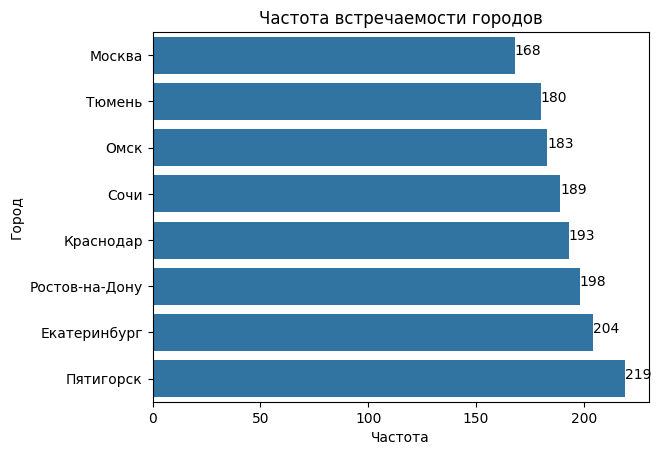

In [15]:
users_pivot =(users.pivot_table(index ='city',
                                values = 'user_id',
                                aggfunc='count'
)
             .sort_values(by='user_id')
             .reset_index()
             .rename(columns = {'user_id' : 'count'}))

# строим график
sns.barplot( y="city", x="count", data =users_pivot).set_title('Частота встречаемости городов');
plt.xlabel("Частота");
plt.ylabel("Город");

# добавим частоту к каждому городу
for index ,value in enumerate(users_pivot.values):
    plt.text(value[1], index, str(value[1]))

На графике видно, что больше всего сервисом пользуются в Пятгеорске (219), а меньше в Москве (168).

##### Cоотношение пользователей с подпиской и без подписки <a id='32'></a>

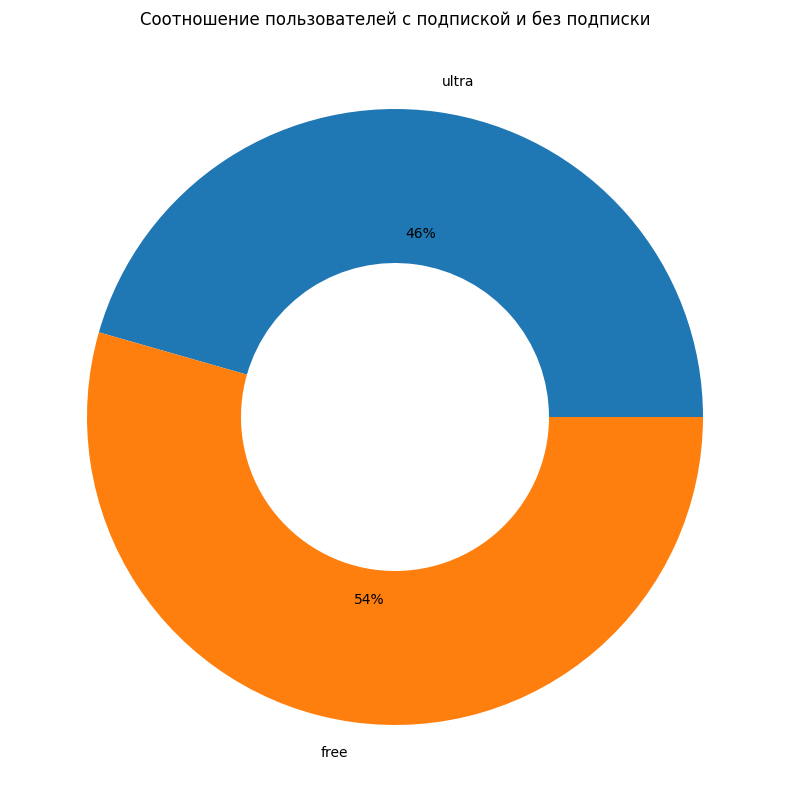

In [16]:
users_pivot =(users.pivot_table(index ='subscription_type',
                                values = 'user_id',
                                aggfunc='count'
)
             .sort_values(by='user_id')
             .rename(columns = {'user_id' : 'count'}))

(users_pivot.plot.pie(y='count',
                      autopct='%.0f%%', 
                      figsize=(10, 10), 
                      legend=False, 
                      wedgeprops=dict(width=0.5))
 .set_title('Cоотношение пользователей с подпиской и без подписки')

);

plt.ylabel('');

Итак, 46% пользователей пользуются подписокй, а 54% ее не имеют.

##### Возраст пользователей <a id='33'></a>

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

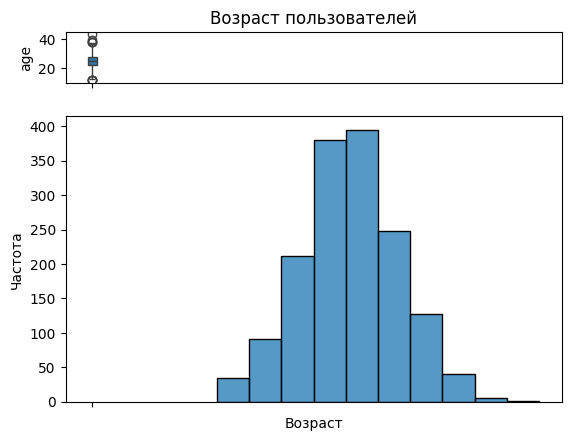

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(users["age"], ax=ax_box).set_title('Возраст пользователей');
sns.histplot(data=users, x="age", ax=ax_hist, bins=10);

ax_box.set(xlabel='');
plt.xlabel('Возраст');
plt.ylabel('Частота');

users['age'].describe()

Видим, что средний возраст пользователей составляет 25 лет, при этом минимальный возраст сотсавляет 12 лет, а максимальный 43 года.

##### Расстояние, которое пользователь преодолел за одну поездку <a id='34'></a>

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

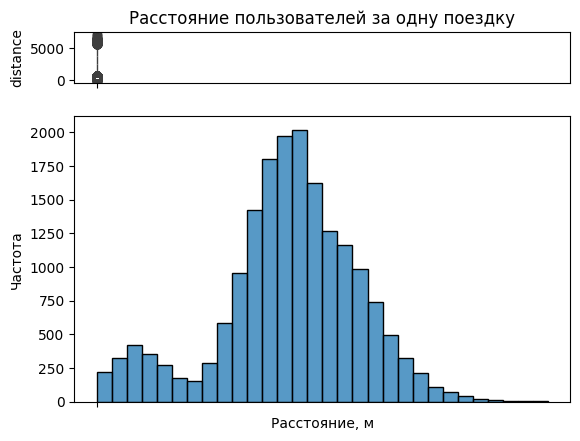

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(rides['distance'], ax=ax_box).set_title('Расстояние пользователей за одну поездку');
sns.histplot(data=rides, x='distance', ax=ax_hist, bins=30);

ax_box.set(xlabel='');
plt.xlabel('Расстояние, м');
plt.ylabel('Частота');

rides['distance'].describe()

В среднем пользователи преодолевают около 3100 м. При этом минимальное значение составляет около 1 м, а макимальное 7200, скорее всего пользователи могли случайно выбрать не тот самокат, например, при минимальном расстояние.

##### Продолжительность поездок <a id='35'></a>

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

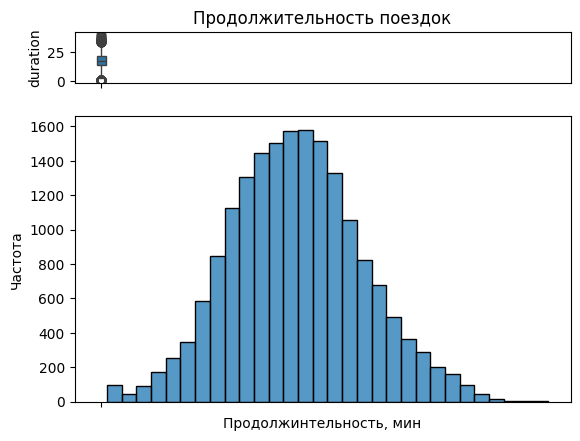

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(rides['duration'], ax=ax_box).set_title('Продолжительность поездок');
sns.histplot(data=rides, x='duration', ax=ax_hist, bins=30);

ax_box.set(xlabel='');
plt.xlabel('Продолжинтельность, мин');
plt.ylabel('Частота');

rides['duration'].describe()

Итак, в среднем пользователи катаются на электросамокатах 18 минут. При этом минимальное количество времени составляет 30 секунд, а макимальное 41 минуту.

##### Выводы <a id='36'></a>

- Больше всего сервисом пользуются в Пятгеорске (219), а меньше в Москве (168).
- 46% пользователей пользуются подписокй, а 54% ее не имеют.
- Средний возраст пользователей составляет 25 лет, при этом минимальный возраст сотсавляет 12 лет, а максимальный 43 года.
- В среднем пользователи преодолевают около 3100 м. При этом минимальное значение составляет около 1 м, а макимальное 7200, скорее всего пользователи могли случайно выбрать не тот самокат, например, при минимальном расстояние.
- В среднем пользователи катаются на электросамокатах 18 минут. При этом минимальное количество времени составляет 30 секунд, а макимальное 41.

#### Шаг 4. Объединение данных <a id='4'></a>

##### Объединить данные о пользователях, поездках и подписках в один датафрейм <a id='41'></a>

С помощью метода `merge` объединим все таблицы. Выведем общую информацию о новом датасете и первые 10 строчек.

In [20]:
df_merge = pd.merge(users, rides, on='user_id', how='inner')
df = pd.merge(df_merge, subs, on='subscription_type', how='inner')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Так как из 3 датасетов, максимальное количество строк было в `users` (18068 строк), то будем сравнивать число строк в `users` со скелинной таблицей.

In [21]:
'Число строк совпадает с датасетом users' if df.shape[0] == 18068 else 'Требуется проверить данные или код'

'Число строк совпадает с датасетом users'

##### Создадим два датафрейма с подписками и без из df <a id='42'></a>

С помощью метода `query()` сделаем срез для 2 случаев, и запишим их в отдельные датасеты. Проверим, совпадают ли количество строк с основным датафреймом.

In [22]:
df_with_sub = df.query("subscription_type == 'ultra'")
df_without_sub = df.query("subscription_type == 'free'")

# проверяем, что сумма общего числа строк в 2 датафреймах совпадает с основным
print( "Число строк совпадает с основным датафреймом" if (df_with_sub.shape[0] + df_without_sub.shape[0]) 
      ==  df.shape[0] else "Нужна дополнительная проверка")

Число строк совпадает с основным датафреймом


##### Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий <a id='43'></a>

Построим графики для пользователей обеих категорий, сравним их расстояния и время поездок.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

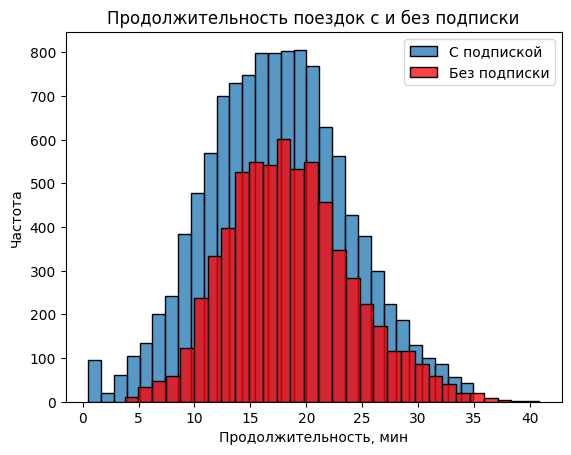

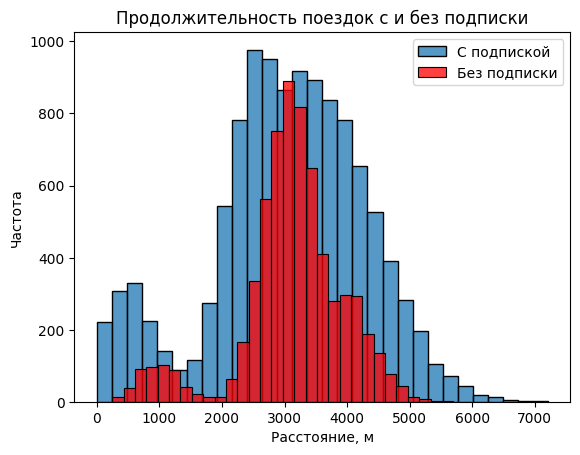

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [23]:
display(df_without_sub['duration'].describe())
display(df_with_sub['duration'].describe())

sns.histplot(data=df_without_sub, x='duration', bins=30);
sns.histplot(data=df_with_sub, x='duration', bins=30, color='red').set_title('Продолжительность поездок с и без подписки');

plt.xlabel('Продолжительность, мин');
plt.ylabel('Частота');
plt.legend (('С подпиской', 'Без подписки'));

plt.show()

sns.histplot(data=df_without_sub, x='distance', bins=30);
sns.histplot(data=df_with_sub, x='distance', bins=30, color='red').set_title('Продолжительность поездок с и без подписки');

plt.xlabel('Расстояние, м');
plt.ylabel('Частота');
plt.legend (('С подпиской', 'Без подписки'));

plt.show()


display(df_without_sub['distance'].describe())
df_with_sub['distance'].describe()

Имеем, что пользователи с и без подписки в целом имеют схожие модели поведения, исходя из полученных графиков расстояния и времени поездки.

##### Выводы <a id='44'></a>

- Обеденили 3 датафрейма в один с помощью метода `merge()`.
- Создали два датафрейма с подписками и без и визуализировали полученные данные.
- Пользователи с и без подписки в целом имеют схожие модели поведения, исходя из полученных графиков расстояния и времени поездки.

#### Шаг 5. Подсчёт выручки <a id='5'></a>

##### Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц <a id='51'></a>

Перед тем, как агрегировать данные округим столбец `duration`.

In [24]:
df['duration'] = np.ceil(df['duration']).astype(int)

Создадим новый датафрейм с агрегированными данными из `df`. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [25]:
df_sum = (df.groupby(['user_id', 'month']).agg(
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first'),
    duration_sum=('duration', 'sum'),
    distance_sum=('distance', 'sum'),
    user_id_count=('user_id', 'count')
)
          .reset_index())
df_sum.describe()

,user_id,month,minute_price,start_ride_price,subscription_fee,duration_sum,distance_sum,user_id_count
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,811.061160,6.477539,7.199894,29.997352,79.610537,29.186127,4896.362584,1.594564
std,440.350798,3.443928,0.979861,24.496519,97.496144,16.752464,2911.516556,0.831604
min,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,2.570787,1.000000
25%,435.000000,4.000000,6.000000,0.000000,0.000000,17.000000,2972.202146,1.000000
50%,843.000000,6.000000,8.000000,50.000000,0.000000,24.000000,3988.723985,1.000000
75%,1191.000000,9.000000,8.000000,50.000000,199.000000,38.000000,6421.375890,2.000000
max,1534.000000,12.000000,8.000000,50.000000,199.000000,143.000000,23429.487786,7.000000


- Суммарная продолжительность поездки в среднем сотсавляет 29 минут, суммарное расстояние около 5 км.
- Изходя из даннх, некоторые пользователи использовали сервис 1 раз.
- Максимальное суммарное расстояние составляет 23.5 км. Кто-то очень сильно любит кататься :)

##### Добавить столбец с помесячной выручкой, которую принёс каждый пользователь <a id='52'></a>

Добавим столбец с помесячной выручкой для каждого пользователя.

In [26]:
df_sum['month_revenue'] = ( df_sum['start_ride_price'] * df_sum['user_id_count'] + 
                           df_sum['minute_price'] * df_sum['duration_sum'] +
                           df_sum['subscription_fee']

)
df_sum['month_revenue'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: month_revenue, dtype: float64

- В среднем за месяц пользователи тратят 342 рубля на прокат самоката. 
- Минимальная выручка с пользователя за месяц составляет 58 рублей, а максимальная 1444.

##### Выводы <a id='53'></a>

- Суммарная продолжительность поездки в среднем сотсавляет 29 минут, суммарное расстояние около 5 км.
- Изходя из даннх, некоторые пользователи использовали сервис 1 раз.
- Максимальное суммарное расстояние составляет 23.5 км. Кто-то очень сильно любит кататься :)
- В среднем за месяц пользователи тратят 342 рубля на прокат самоката. 
- Минимальная выручка с пользователя за месяц составляет 58 рублей, а максимальная 1444.

#### Шаг 6. Проверка гипотез <a id='6'></a>

##### Проверить:  тратят ли пользователи с подпиской больше времени на поездки <a id='61'></a>

Сформируем гипотезу:
- H0: Пользователи с и без подписки тратят одинаковое количество времени на поездки
- H1: Пользователи с подпиской тратят больше времени на поездки

In [27]:
alpha = 0.05

res = st.ttest_ind(df_with_sub['duration'],
                  df_without_sub['duration'],
                  equal_var=False, 
                  alternative='greater')

print('p-value= ', res.pvalue)

"H1: Пользователи с подпиской тратят больше времени на поездки" if res.pvalue < alpha else "H0: Пользователи с и без подписки \
тратят одинаковое количество времени на поездки"

p-value=  5.6757813771289775e-37


'H1: Пользователи с подпиской тратят больше времени на поездки'

In [28]:
print('Средняя продолжительность поездки пользователей с подпиской =', df_with_sub['duration'].mean())
print('Средняя продолжительность поездки пользователей без подписки =', df_without_sub['duration'].mean())

Средняя продолжительность поездки пользователей с подпиской = 18.54198516280583
Средняя продолжительность поездки пользователей без подписки = 17.39090929866399


Применив гипотезу о равенстве генеральных средних двух распределений, получили, что пользватели с подпиской тратят больше времени на поездки при уровне значимости 0.05. Средняя продолжительность поездки пользователей с подпиской 18.5 минут, а без 17.4 мин.

##### Проверить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров <a id='62'></a>

Сформируем гипотезу:

- H0: За одну поездку пользователи с подпиской проезжают в среднем  3130 метров. 
- H1: За одну поездку пользователи с подпиской проезжают в среднем больше 3130 метров.

Воспользуемся одностроней гипотезей, отрезав левый хвост.

In [31]:
meter = 3130
alpha = 0.05

res = st.ttest_1samp(df.query('subscription_type == "ultra"')['duration'],
                  meter, 
                  alternative='greater')

print('p-value= ', res.pvalue)

"За одну поездку пользователи с подпиской проезжают в среднем больше 3130 метров" if res.pvalue \
< alpha else "За одну поездку пользователи с подпиской проезжают в среднем меньше 3130 метров"

p-value=  1.0


'За одну поездку пользователи с подпиской проезжают в среднем меньше 3130 метров'

Проверив одностороннюю гипотезу, получили, что за одну поездку пользователи с подпиской проезжают в среднем меньше 3130 метров при уровне значимости 0.05.

##### Проверить, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. <a id='63'></a>

Сформируем гипотезу:

- H0: Помесячная выручка от пользователей с подпиской равна выручке пользователей без подписки.
- H1: Помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки.

In [32]:
alpha = 0.05

res = st.ttest_ind(df_sum.query('subscription_type == "ultra"')['month_revenue'],
                  df_sum.query('subscription_type == "free"')['month_revenue'],
                  equal_var=False, 
                  alternative='greater')

print('p-value= ', res.pvalue)

"H1:Помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки" if res.pvalue < alpha else "H0: \
Помесячная выручка от пользователей с подпиской равна выручке пользователей без подписки"

p-value=  8.874140893976874e-40


'H1:Помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки'

In [33]:
print('В средем ежемесячная поездка пользователей с подпиской составляет',  
      df_sum.query('subscription_type == "ultra"')['month_revenue'].mean())
print('В средем ежемесячная поездка пользователей без подписки составляет',  
      df_sum.query('subscription_type == "free"')['month_revenue'].mean())

В средем ежемесячная поездка пользователей с подпиской составляет 362.7921906022502
В средем ежемесячная поездка пользователей без подписки составляет 328.6413651073845


Применив гипотезу о равенстве генеральных средних двух распределений, получили, что помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки при уровне значимости 0.05. Ежемесячная поездка пользователей с подпиской составляет 363 рубля, а без подписки 329 рублей.

##### Выборки до и после обновления сервера. <a id='64'></a>

**Вопрос:**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**

Поскольку у нас есть 2 выборки до и после обновления, то они будут зависеть друг от друга. В данном случае подойдет t-test для 2 зависимых выборок. Библиотека `scipy.stats` обширна своим функционалом, можно даже утерждать, что она как швецарский нож для анализа данных :). В данном случае нам понадобится метод `st.ttest_rel(before, after)`, где `before` - количество обращений до, `after` -количество обращений после.

##### Вывод <a id='65'></a>

- Применив гипотезу о равенстве генеральных средних двух распределений, получили, что пользватели с подпиской тратят больше времени на поездки при уровне значимости 0.05. Средняя продолжительность поездки пользователей с подпиской 18.5 минут, а без 17.4 мин.
- Проверив одностороннюю гипотезу, получили, что за одну поездку пользователи с подпиской проезжают в среднем меньше 3130 метров при уровне значимости 0.05.
- Применив гипотезу о равенстве генеральных средних двух распределений, получили, что помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки при уровне значимости 0.05. Ежемесячная поездка пользователей с подпиской составляет 363 рубля, а без подписки 329 рублей.

#### Шаг 7. Распределения <a id='7'></a>

##### Исследовние акций с промокодом <a id='71'></a>

**Задача**

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

**Решение**

Для решения этой задачи мы можем использовать биномиальное распределение, так как у нас есть два исхода для каждого клиента: он либо продлит подписку, либо нет. 

Пусть p - вероятность продления подписки после пробного периода, равная 0.1. Тогда вероятность отказа от продления подписки q = 1 - p = 0.9.

Для того чтобы найти минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план была примерно 5%, мы можем воспользоваться формулой биномиального распределения:

P(X <= 100) = F(100, n, p) >= 0.95,

где X - количество клиентов, продливших подписку, n - количество разосланных промокодов, p=0.1 - вероятность продления подписки.

In [34]:
# функция, которая вычисляет минимальное число промокодов, которые нужно разослать

def binom_dist(p, k, conf):
    
    n = np.arange(k, 20*k)
    dist = 1 - st.binom.cdf(k, n, p)
    req_num = n[dist >= conf][0]
    
    return req_num

In [35]:
p = 0.1
k = 100
conf = 0.95

req_num = binom_dist(p, k, conf)
print('Минимальное количество промокодов нужно разослать =', req_num)

Минимальное количество промокодов нужно разослать = 1172


In [36]:
# функция построения графика биноминального распределения с ранее расчитаным n

def cdf_binom(req, p):
    
    _, ax = plt.subplots(1, 1, figsize=(15, 10))
    x = np.arange(0, req+1, 1)
    ax.plot(x, 1-st.binom.cdf(x, req, p), lw=2)
    ax.set_xlabel("Количество промокодов")
    ax.set_ylabel("Вероятность")
    ax.set_title("Биноминальное распределение B(" + str(req_num) + "," + str(p) + ")")

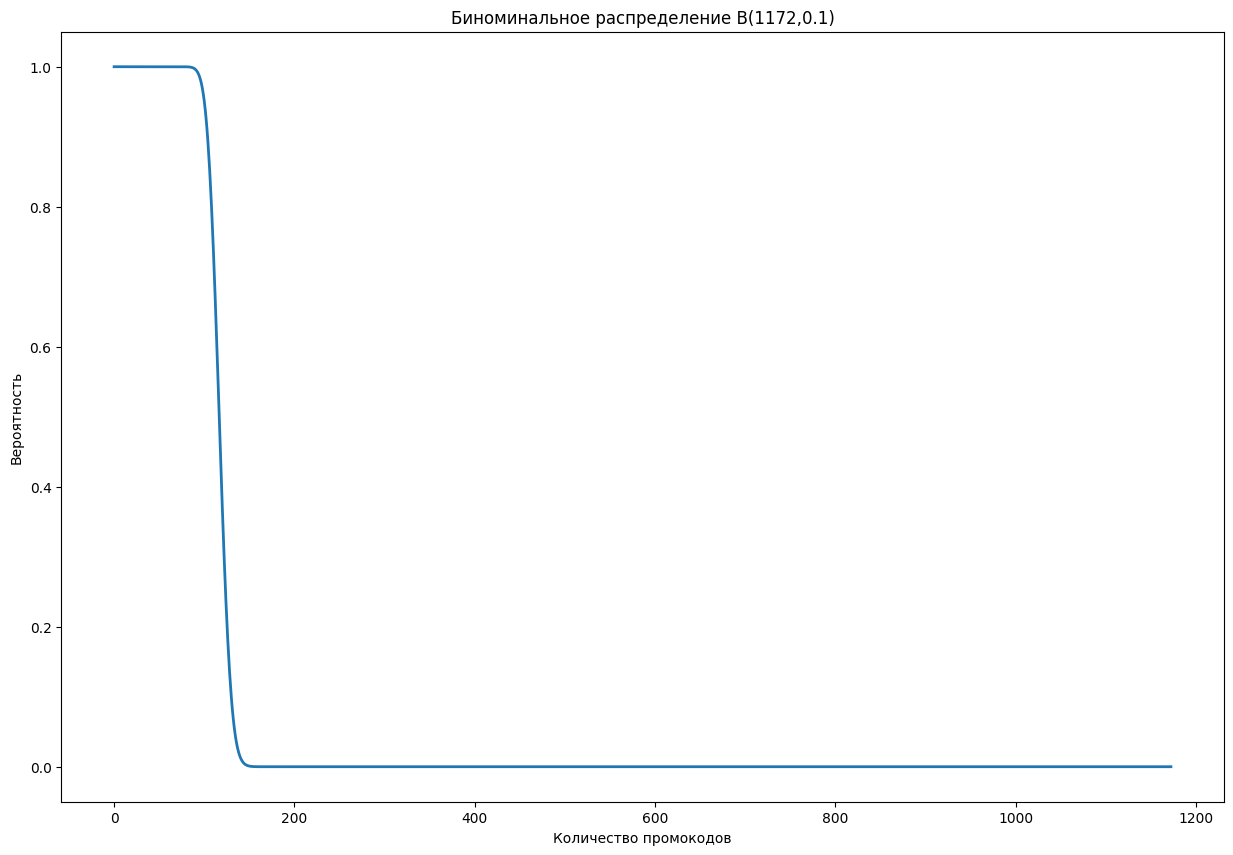

In [37]:
cdf_binom(req_num, p)

Итак, минимальное число промокодов, которые нужно разослать составляет 1172, чтобы вероятность не выполнить план составляля не более 5%.

##### Исследования push-уведомлений в мобильном приложении <a id='72'></a>

**Задача**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

**Решение**

Для оценки вероятности того, что уведомление откроют не более 399,5 тыс. пользователей, мы можем использовать нормальное распределение, так как количество пользователей, открывших уведомление, следует биномиальному распределению, которое можно аппроксимировать нормальным распределением при больших значениях n.

Среднее значение биномиального распределения равно np, где n - количество уведомлений, а p - вероятность открытия уведомления. В данном случае среднее значение равно 1 000 000 * 0,4 = 400 000.

Дисперсия биномиального распределения равна np(1-p), что в данном случае равно 1 000 000 * 0,4 * 0,6 = 240 000.

Теперь мы можем использовать нормальное распределение со средним значением 400 000 и стандартным отклонением sqrt(240 000) = 489.9.

In [38]:
n = 1000000
p = 0.4
max_cliient = 399500


mu = n * p
sigma = (n * p * (1-p))**0.5

distr = st.norm(mu, sigma)

result = distr.cdf(399500)
print('Вероятность, что откроют не более 399.5 тыс. пользователей', result)

Вероятность, что откроют не более 399.5 тыс. пользователей 0.15371708296369768


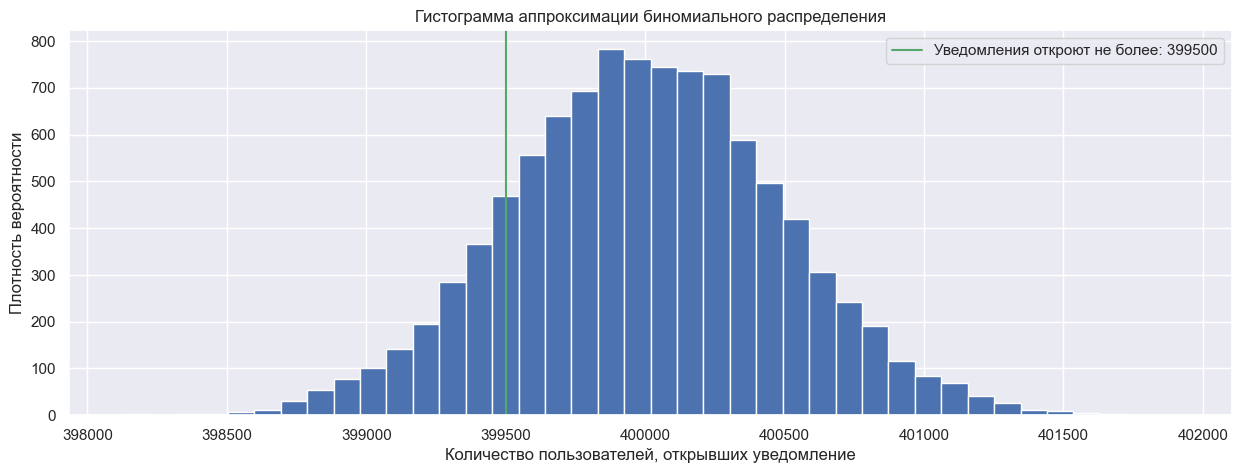

In [39]:
approc_norm = np.random.normal(mu,sigma, size=10000)

sns.set(rc={'figure.figsize':(15,5)})
plt.hist(approc_norm, bins=40);
plt.axvline(x=max_cliient, color='g', linestyle='-', label=f'Уведомления откроют не более: {max_cliient}');

plt.xlabel("Количество пользователей, открывших уведомление")
plt.ylabel("Плотность вероятности")
plt.title("Гистограмма аппроксимации биномиального распределения")
plt.legend();

При отправке уведомлений 1 000 000 клиентам вероятность того, что количество пользователей, не открывших уведомление, не превысит 399 500 человек, составляет примерно 15%.

#### Общий вывод <a id='8'></a>

На каждом этапе были сделаны соотвествующие выводы:

**Шаг 1. Загрузка данных**:

- В таблице users всего 1565 значений, а также отустсвуют пропущенные данные. Тип данных user_id и age - int64.
- В таблице rides всего 18068 значений, а также отустсвуют пропущенные данные. Тип данных user_id - int64, distance и duration - - float64. Столбец date нужно будет преобразовать из object в datetime64.
- В датасете subs всего 2 значения.
- В таблицах отсутствуют пропуски.

**Шаг 2. Предобработка данных:**

- Для датасета rides в столбце date поменяли тип данных на datetime64.
- Добавлен столбец month в датафрейм rides.
- В датафреймах отстутсвуют пустые значения.
- В таблицах rides и subs нет дубликатов.
- В useres присутствовал 31 дубликат, так как соотношение дкбликатов к общему числу строк составлял около 2%, то были убраны дублирующие строки.

**Шаг 3. Исследовательский анализ данных**

- Больше всего сервисом пользуются в Пятгеорске (219), а меньше в Москве (168).
- 46% пользователей пользуются подписокй, а 54% ее не имеют.
- Средний возраст пользователей составляет 25 лет, при этом минимальный возраст сотсавляет 12 лет, а максимальный 43 года.
- В среднем пользователи преодолевают около 3100 м. При этом минимальное значение составляет около 1 м, а макимальное 7200, скорее всего пользователи могли случайно выбрать не тот самокат, например, при минимальном расстояние.
- В среднем пользователи катаются на электросамокатах 18 минут. При этом минимальное количество времени составляет 30 секунд, а макимальное 41.

**Шаг 4. Объединение данных**

- Обеденили 3 датафрейма в один с помощью метода merge().
- Создали два датафрейма с подписками и без и визуализировали полученные данные.
- Пользователи с и без подписки в целом имеют схожие модели поведения, исходя из полученных графиков расстояния и времени поездки.

**Шаг 5. Подсчёт выручки**

- Суммарная продолжительность поездки в среднем сотсавляет 29 минут, суммарное расстояние около 5 км.
- Изходя из даннх, некоторые пользователи использовали сервис 1 раз.
- Максимальное суммарное расстояние составляет 23.5 км. Кто-то очень сильно любит кататься :)
- В среднем за месяц пользователи тратят 342 рубля на прокат самоката. 
- Минимальная выручка с пользователя за месяц составляет 58 рублей, а максимальная 1444.

**Шаг 6. Проверка гипотез**

- Применив гипотезу о равенстве генеральных средних двух распределений, получили, что пользватели с подпиской тратят больше времени на поездки при уровне значимости 0.05. Средняя продолжительность поездки пользователей с подпиской 18.5 минут, а без 17.4 мин.
- Проверив одностороннюю гипотезу, получили, что за одну поездку пользователи с подпиской проезжают в среднем меньше 3130 метров при уровне значимости 0.05.
- Применив гипотезу о равенстве генеральных средних двух распределений, получили, что помесячная выручка от пользователей с подпиской выше выручки пользователей без подписки при уровне значимости 0.05. Ежемесячная поездка пользователей с подпиской составляет 363 рубля, а без подписки 329 рублей.

**Шаг 7. Распределения**

- Минимальное число промокодов, которые нужно разослать составляет 1172, чтобы вероятность не выполнить план составляля не более 5%
- При отправке уведомлений 1 000 000 клиентам вероятность того, что количество пользователей, не открывших уведомление, не превысит 399 500 человек, составляет примерно 15%.